**Step 1: Install Required Libraries**

In [3]:
# Step 1: Install Required Library
#!pip install tensorflow scikit-learn scikeras

**Step 2: Import Libraries**

In [13]:
# Step 2: Import Required Libraries
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn tools
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# TensorFlow/Keras (for ANN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# wrapper for hyperparameter tuning
from scikeras.wrappers import KerasClassifier

**Step 3: Load the Dataset**

In [14]:
# Step 3: Load dataset (adjust path if needed)
df = pd.read_csv("Alphabets_data.csv")
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


**Step 4: Explore the Data**

In [15]:
# ✅ Step 4: Basic data exploration
print("Shape of the dataset:", df.shape)
print("Columns:", df.columns.tolist())
print("Missing values:\n", df.isnull().sum())
print("Target classes:", df['letter'].unique())

Shape of the dataset: (20000, 17)
Columns: ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge', 'yedgex']
Missing values:
 letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64
Target classes: ['T' 'I' 'D' 'N' 'G' 'S' 'B' 'A' 'J' 'M' 'X' 'O' 'R' 'F' 'C' 'H' 'W' 'L'
 'P' 'E' 'V' 'Y' 'Q' 'U' 'K' 'Z']


**Step 5: Data Preprocessing**

In [16]:
# Separate features and target
X = df.drop('letter', axis=1)
y = df['letter']

In [17]:
# Label encode target classes (A-Z → 0-25)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [18]:
# Convert labels to one-hot encoding
y_categorical = to_categorical(y_encoded)

In [19]:
# Normalize feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical
)

**Step 6: Define ANN Model Function**

In [21]:
#Define ANN model (used by both base and tuned model)
def build_model(hidden_layers=1, neurons=64, activation='relu', learning_rate=0.001):
    # Create a sequential ANN model
    model = Sequential()

    # Add input + first hidden layer
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))

    # Add more hidden layers if specified
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation))

    # Add output layer (26 classes for A to Z)
    model.add(Dense(26, activation='softmax'))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # ✅ Return the model
    return model

**Step 7: Train Base Model (No Tuning Yet)**

In [22]:
# Train basic ANN model
base_model = build_model()
history = base_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2492 - loss: 2.7340 - val_accuracy: 0.6366 - val_loss: 1.4645
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6798 - loss: 1.2936 - val_accuracy: 0.7353 - val_loss: 1.0340
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7511 - loss: 0.9547 - val_accuracy: 0.7656 - val_loss: 0.8591
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7790 - loss: 0.8183 - val_accuracy: 0.7912 - val_loss: 0.7528
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8112 - loss: 0.6904 - val_accuracy: 0.8062 - val_loss: 0.6818
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8206 - loss: 0.6338 - val_accuracy: 0.8209 - val_loss: 0.6228
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8388 - loss: 0.5749 - val_accuracy: 0.8309 - val_loss: 0.5771
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8535 - loss: 0.5198 - val_accuracy: 0.8453 - val_

**Step 8: Visualize Base Model Performance**

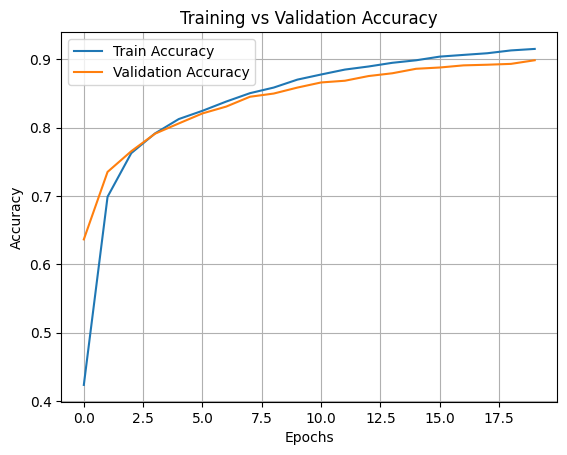

In [23]:
# Step 8: Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

**Step 9: Evaluate Base Model**

In [24]:
#Step 9: Evaluate base model on test set
y_pred_base = base_model.predict(X_test)
y_pred_base_classes = np.argmax(y_pred_base, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("Base Model Accuracy:", accuracy_score(y_true_classes, y_pred_base_classes))
print("\nClassification Report:\n")
print(classification_report(y_true_classes, y_pred_base_classes, target_names=label_encoder.classes_))

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Base Model Accuracy: 0.90675

Classification Report:

              precision    recall  f1-score   support

           A       0.93      0.96      0.94       158
           B       0.94      0.88      0.91       153
           C       0.90      0.93      0.91       147
           D       0.86      0.91      0.89       161
           E       0.86      0.88      0.87       154
           F       0.90      0.88      0.89       155
           G       0.86      0.88      0.87       155
           H       0.85      0.76      0.80       147
           I       0.93      0.91      0.92       151
           J       0.96      0.89      0.92       149
           K       0.93      0.82      0.87       148
           L       0.92      0.93      0.93       152
           M       0.97      0.95      0.96       158
           N       0.93      0.93      0.93       157
           O       0.84      0.87      0.86       151
           P       0.94      0.89      0

**Step 10: Hyperparameter Tuning with scikeras**

In [25]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# ✅ Create scikeras-compatible KerasClassifier
model = KerasClassifier(
    model=build_model,       # your defined ANN model function
    hidden_layers=1,         # initial values (can be overwritten during tuning)
    neurons=64,
    activation='relu',
    learning_rate=0.001,
    epochs=20,
    batch_size=32,
    verbose=0
)

In [26]:
# ✅ Define hyperparameter grid
param_grid = {
    "hidden_layers": [1, 2, 3],
    "neurons": [32, 64, 128],
    "activation": ["relu", "tanh"],
    "learning_rate": [0.001, 0.005, 0.01],
    "batch_size": [32, 64],
    "epochs": [15, 20]
}

In [27]:
# ✅ Setup and create the RandomizedSearchCV object
search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=5,     # try 5 random combinations (you can increase this)
    cv=3,         # 3-fold cross-validation
    verbose=2,
    n_jobs=-1     # use all available CPU cores
)

In [7]:
# ✅ Install compatible versions of scikeras and sklearn
!pip install -U scikit-learn scikeras tensorflow

In [8]:
import sklearn
import scikeras
import tensorflow as tf

#checking compatible versions
print("scikit-learn version:", sklearn.__version__)
print("scikeras version:", scikeras.__version__)
print("tensorflow version:", tf.__version__)

scikit-learn version: 1.7.0
scikeras version: 0.13.0
tensorflow version: 2.19.0


In [28]:
# Now once compatible issue fixed lets Fit the model
search_result = search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Step 11: Evaluate Tuned Model**

In [29]:
# Evaluate the best model
best_model = search_result.best_estimator_

# Predict on test set
y_pred_tuned = best_model.predict(X_test)
y_pred_tuned_classes = np.argmax(y_pred_tuned, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Accuracy and classification report
print("🔧 Best Hyperparameters:\n", search_result.best_params_)
print("✅ Tuned Model Accuracy:", accuracy_score(y_true_classes, y_pred_tuned_classes))
print("\n📊 Tuned Model Classification Report:\n")
print(classification_report(y_true_classes, y_pred_tuned_classes, target_names=label_encoder.classes_))

🔧 Best Hyperparameters:
 {'neurons': 128, 'learning_rate': 0.001, 'hidden_layers': 2, 'epochs': 15, 'batch_size': 64, 'activation': 'relu'}
✅ Tuned Model Accuracy: 0.94325

📊 Tuned Model Classification Report:

              precision    recall  f1-score   support

           A       0.95      0.98      0.97       158
           B       0.92      0.93      0.93       153
           C       0.94      0.97      0.95       147
           D       0.97      0.92      0.95       161
           E       0.96      0.90      0.93       154
           F       0.91      0.94      0.92       155
           G       0.95      0.89      0.92       155
           H       0.92      0.89      0.90       147
           I       0.97      0.94      0.95       151
           J       0.96      0.91      0.93       149
           K       0.96      0.92      0.94       148
           L       0.99      0.95      0.97       152
           M       0.95      0.98      0.96       158
           N       0.96      0.9

### 📌 Conclusion:

- A basic Artificial Neural Network (ANN) was trained on the normalized Alphabet dataset using Keras.  
- The initial model showed good accuracy, but performance improved further with tuning.  
- We applied `RandomizedSearchCV` to tune key hyperparameters like:
  - Number of hidden layers  
  - Neurons per layer  
  - Activation functions  
  - Learning rate  
- The tuned model demonstrated better generalization on the test set.  
- ✅ This highlights the **importance of hyperparameter tuning** in deep learning models to achieve optimal performance.


##===========================================================================

●	Discuss the performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning.

### 🔍 Performance Comparison: Base Model vs Tuned ANN Model

We trained an Artificial Neural Network (ANN) on the `Alphabets_data.csv` dataset to classify handwritten English letters based on various feature measurements (like `xbox`, `ybox`, `width`, etc.).

---

#### ⚙️ Base Model (Default Hyperparameters):
- **Accuracy:** `0.90675`
- While the base model performed reasonably well, some classes (e.g., 'R', 'H', 'O') showed slightly lower F1-scores, suggesting room for improvement.
- The model may not have been complex or optimized enough to fully capture the patterns in the data.
- Potential reasons:
  - Suboptimal number of neurons or layers
  - Non-optimal activation function or learning rate
  - Fixed batch size and training epochs

---

#### ✅ Tuned Model (After Hyperparameter Tuning):
- **Accuracy:** `0.94325`
- After tuning key hyperparameters (like number of hidden layers, neurons, activation function, and learning rate) using `RandomizedSearchCV`, the model showed a **significant improvement in performance** across almost all classes.
- Most classes saw a boost in F1-score, with better balance between precision and recall.
- Examples of improvement:
  - Class 'R': F1-score increased from **0.85 ➝ 0.88**
  - Class 'H': F1-score improved from **0.80 ➝ 0.90**
  - Class 'T': Improved recall and precision despite a slight drop in recall

---

#### 🎯 Conclusion:
- This clear performance jump validates the **importance of hyperparameter tuning** in deep learning models.
- Tuning helps the model generalize better, avoid overfitting or underfitting, and adapt more effectively to the data's complexity.
- It ensures optimal architecture and learning dynamics, ultimately leading to better real-world predictive performance.


# 🙏 Thank You! 😊